In [1]:
"""
Exercise 5: Evaluation Metrics
Neural Network Classification - Module 3

This exercise covers:
- Setting up torchmetrics
- Calculating accuracy, precision, recall, F1-score
- Creating confusion matrices
- Visualizing confusion matrices
- Comparing models using multiple metrics

Learning Mottos:
- If in doubt, run the code!
- Experiment, experiment, experiment!
- Visualize, visualize, visualize!
"""


'\nExercise 5: Evaluation Metrics\nNeural Network Classification - Module 3\n\nThis exercise covers:\n- Setting up torchmetrics\n- Calculating accuracy, precision, recall, F1-score\n- Creating confusion matrices\n- Visualizing confusion matrices\n- Comparing models using multiple metrics\n\nLearning Mottos:\n- If in doubt, run the code!\n- Experiment, experiment, experiment!\n- Visualize, visualize, visualize!\n'

In [2]:

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


In [3]:

# ============================================
# Part 1: Setup and Data Preparation
# ============================================

print("=" * 60)
print("Part 1: Setup and Data Preparation")
print("=" * 60)

# Create binary classification dataset
X, y = make_circles(n_samples=1000, noise=0.03, factor=0.5, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


Part 1: Setup and Data Preparation
Using device: cpu


In [4]:

# ============================================
# Part 2: Define and Train Model
# ============================================

print("\n" + "=" * 60)
print("Part 2: Define and Train Model")
print("=" * 60)

# Define non-linear model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = BinaryClassifier().to(device)

# Train model
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    loss = criterion(y_logits, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("\nTraining complete!")



Part 2: Define and Train Model
Epoch [20/100], Loss: 0.6375
Epoch [40/100], Loss: 0.4433
Epoch [60/100], Loss: 0.1603
Epoch [80/100], Loss: 0.0372
Epoch [100/100], Loss: 0.0126

Training complete!


In [5]:

# ============================================
# Part 3: Calculate Metrics with sklearn
# ============================================

print("\n" + "=" * 60)
print("Part 3: Calculate Metrics with sklearn")
print("=" * 60)

# Make predictions
model.eval()
with torch.inference_mode():
    test_logits = model(X_test)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs > 0.5).long()

# Convert to numpy for sklearn
y_true = y_test.cpu().numpy().squeeze()
y_pred = test_preds.cpu().numpy().squeeze()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Classification Metrics:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1']))



Part 3: Calculate Metrics with sklearn
Classification Metrics:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       100
     Class 1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [6]:

# ============================================
# Part 4: Confusion Matrix
# ============================================

print("\n" + "=" * 60)
print("Part 4: Confusion Matrix")
print("=" * 60)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"\nTP={cm[1,1]}, TN={cm[0,0]}, FP={cm[0,1]}, FN={cm[1,0]}")

# Explain the confusion matrix
print("\nConfusion Matrix Explained:")
print("                Predicted")
print("           Positive    Negative")
print("Actual  Pos    TP         FN")
print("        Neg    FP         TN")
print("\nTP = True Positive  (correctly predicted positive)")
print("TN = True Negative  (correctly predicted negative)")
print("FP = False Positive (incorrectly predicted positive)")
print("FN = False Negative (incorrectly predicted negative)")



Part 4: Confusion Matrix
Confusion Matrix:
[[100   0]
 [  0 100]]

TP=100, TN=100, FP=0, FN=0

Confusion Matrix Explained:
                Predicted
           Positive    Negative
Actual  Pos    TP         FN
        Neg    FP         TN

TP = True Positive  (correctly predicted positive)
TN = True Negative  (correctly predicted negative)
FP = False Positive (incorrectly predicted positive)
FN = False Negative (incorrectly predicted negative)



Part 5: Visualizing Confusion Matrix


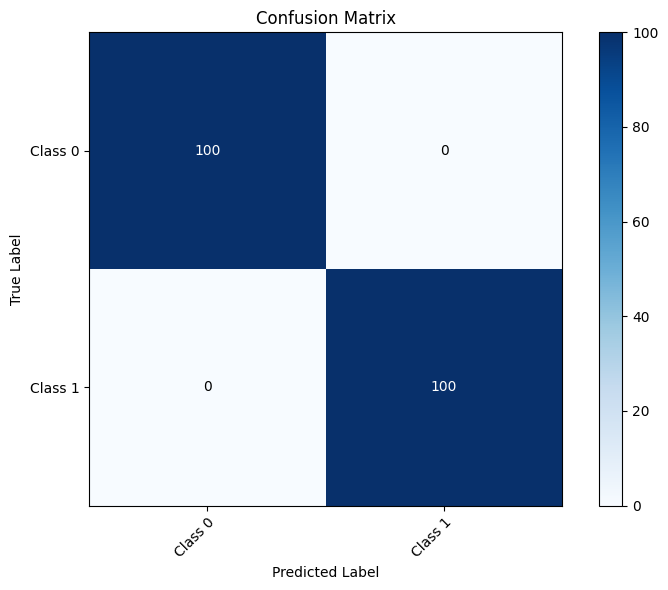

In [7]:

# ============================================
# Part 5: Visualizing Confusion Matrix
# ============================================

print("\n" + "=" * 60)
print("Part 5: Visualizing Confusion Matrix")
print("=" * 60)

def plot_confusion_matrix(cm, class_names=None, title='Confusion Matrix'):
    """Plot confusion matrix with annotations"""
    if class_names is None:
        class_names = [f'Class {i}' for i in range(len(cm))]

    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Configure axes
    ax.set(
        xticks=np.arange(len(class_names)),
        yticks=np.arange(len(class_names)),
        xticklabels=class_names,
        yticklabels=class_names,
        title=title,
        ylabel='True Label',
        xlabel='Predicted Label'
    )

    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Annotate cells
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha='center', va='center',
                   color='white' if cm[i, j] > thresh else 'black')

    fig.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names=['Class 0', 'Class 1'])


In [8]:

# ============================================
# Part 6: Understanding Precision vs Recall
# ============================================

print("\n" + "=" * 60)
print("Part 6: Understanding Precision vs Recall")
print("=" * 60)

print("Precision vs Recall Trade-off:")
print("\nHigh Precision, Low Recall:")
print("  - Very confident when predicting positive")
print("  - Few false positives")
print("  - But misses many actual positives")
print("  Example: Spam filter (don't mark legitimate email as spam)")

print("\nLow Precision, High Recall:")
print("  - Catches most actual positives")
print("  - Many false positives")
print("  - Better to be safe than sorry")
print("  Example: Disease screening (don't miss sick patients)")

print(f"\nThis model:")
print(f"  Precision: {precision:.4f} - Of all predicted positive, {precision*100:.1f}% are correct")
print(f"  Recall:    {recall:.4f} - Of all actual positive, {recall*100:.1f}% are caught")



Part 6: Understanding Precision vs Recall
Precision vs Recall Trade-off:

High Precision, Low Recall:
  - Very confident when predicting positive
  - Few false positives
  - But misses many actual positives
  Example: Spam filter (don't mark legitimate email as spam)

Low Precision, High Recall:
  - Catches most actual positives
  - Many false positives
  - Better to be safe than sorry
  Example: Disease screening (don't miss sick patients)

This model:
  Precision: 1.0000 - Of all predicted positive, 100.0% are correct
  Recall:    1.0000 - Of all actual positive, 100.0% are caught


In [9]:

# ============================================
# Part 7: Using torchmetrics
# ============================================

print("\n" + "=" * 60)
print("Part 7: Using torchmetrics")
print("=" * 60)

try:
    from torchmetrics import Accuracy, Precision, Recall, F1Score, ConfusionMatrix

    # Setup metrics
    accuracy_metric = Accuracy(task='binary')
    precision_metric = Precision(task='binary')
    recall_metric = Recall(task='binary')
    f1_metric = F1Score(task='binary')
    confmat_metric = ConfusionMatrix(task='binary')

    # Calculate metrics
    acc = accuracy_metric(test_preds, y_test)
    prec = precision_metric(test_preds, y_test)
    rec = recall_metric(test_preds, y_test)
    f1 = f1_metric(test_preds, y_test)
    cm_tm = confmat_metric(test_preds, y_test)

    print("torchmetrics Results:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  Confusion Matrix:\n{cm_tm}")

except ImportError:
    print("torchmetrics not installed.")
    print("Install with: pip install torchmetrics")



Part 7: Using torchmetrics
torchmetrics not installed.
Install with: pip install torchmetrics



Part 8: Multi-Class Metrics
Multi-class Metrics:
  Accuracy:  1.0000
  Precision: 1.0000 (macro)
  Recall:    1.0000 (macro)
  F1-Score:  1.0000 (macro)

Confusion Matrix:
[[50  0  0  0]
 [ 0 50  0  0]
 [ 0  0 50  0]
 [ 0  0  0 50]]


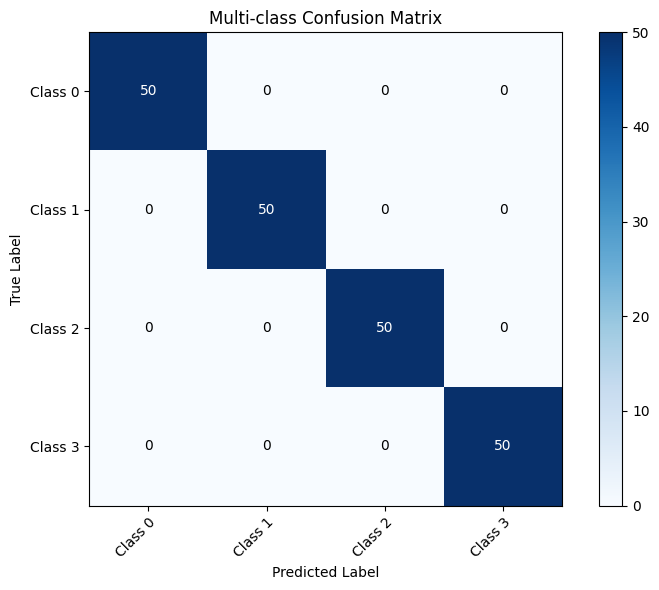

In [10]:

# ============================================
# Part 8: Multi-Class Metrics
# ============================================

print("\n" + "=" * 60)
print("Part 8: Multi-Class Metrics")
print("=" * 60)

# Create multi-class dataset
X_multi, y_multi = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

# Split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

# Convert to tensors
X_test_m = torch.FloatTensor(X_test_m).to(device)
y_test_m = torch.LongTensor(y_test_m).to(device)

# Train simple multi-class model
class MultiClassClassifier(nn.Module):
    def __init__(self):
        super(MultiClassClassifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 4)
        )

    def forward(self, x):
        return self.layers(x)

model_m = MultiClassClassifier().to(device)

# Train
criterion_m = nn.CrossEntropyLoss()
optimizer_m = optim.Adam(model_m.parameters(), lr=0.01)

for epoch in range(100):
    model_m.train()
    outputs = model_m(torch.FloatTensor(X_train_m).to(device))
    loss = criterion_m(outputs, torch.LongTensor(y_train_m).to(device))
    optimizer_m.zero_grad()
    loss.backward()
    optimizer_m.step()

# Make predictions
model_m.eval()
with torch.inference_mode():
    test_logits_m = model_m(X_test_m)
    test_preds_m = torch.argmax(test_logits_m, dim=1)

# Calculate metrics
y_true_m = y_test_m.cpu().numpy()
y_pred_m = test_preds_m.cpu().numpy()

accuracy_m = accuracy_score(y_true_m, y_pred_m)
precision_m = precision_score(y_true_m, y_pred_m, average='macro')
recall_m = recall_score(y_true_m, y_pred_m, average='macro')
f1_m = f1_score(y_true_m, y_pred_m, average='macro')

print("Multi-class Metrics:")
print(f"  Accuracy:  {accuracy_m:.4f}")
print(f"  Precision: {precision_m:.4f} (macro)")
print(f"  Recall:    {recall_m:.4f} (macro)")
print(f"  F1-Score:  {f1_m:.4f} (macro)")

# Confusion matrix
cm_m = confusion_matrix(y_true_m, y_pred_m)
print(f"\nConfusion Matrix:")
print(cm_m)

# Plot multi-class confusion matrix
plot_confusion_matrix(cm_m, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
                     title='Multi-class Confusion Matrix')


In [11]:

# ============================================
# Part 9: Comparing Models
# ============================================

print("\n" + "=" * 60)
print("Part 9: Comparing Models")
print("=" * 60)

print("When comparing models, use multiple metrics:")
print("  1. Accuracy - Overall correctness")
print("  2. Precision - How many predicted positives are correct")
print("  3. Recall - How many actual positives were caught")
print("  4. F1-Score - Balance between precision and recall")

print("\nWhich metric matters most depends on your problem:")
print("  - Spam detection: High precision (don't delete legitimate emails)")
print("  - Disease screening: High recall (don't miss sick patients)")
print("  - Balanced dataset: Accuracy is fine")
print("  - Imbalanced dataset: Use F1-score or precision/recall")



Part 9: Comparing Models
When comparing models, use multiple metrics:
  1. Accuracy - Overall correctness
  2. Precision - How many predicted positives are correct
  3. Recall - How many actual positives were caught
  4. F1-Score - Balance between precision and recall

Which metric matters most depends on your problem:
  - Spam detection: High precision (don't delete legitimate emails)
  - Disease screening: High recall (don't miss sick patients)
  - Balanced dataset: Accuracy is fine
  - Imbalanced dataset: Use F1-score or precision/recall


In [12]:

# ============================================
# Exercises
# ============================================

print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)



Exercises


In [13]:
def train_model(model, criterion, optimizer, epochs, X_train, y_train):
    for epoch in range(epochs):
        model.train()
        y_logits = model(X_train)
        loss = criterion(y_logits, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    print("\nTraining complete!")


Exercise 1: Metrics on imbalanced data
Create imbalanced dataset (90% class 0, 10% class 1)
Compare accuracy vs F1-score
Tip: Use make_circles with different sample weights
Class distribution:
Class 0: 2500
Class 1: 375


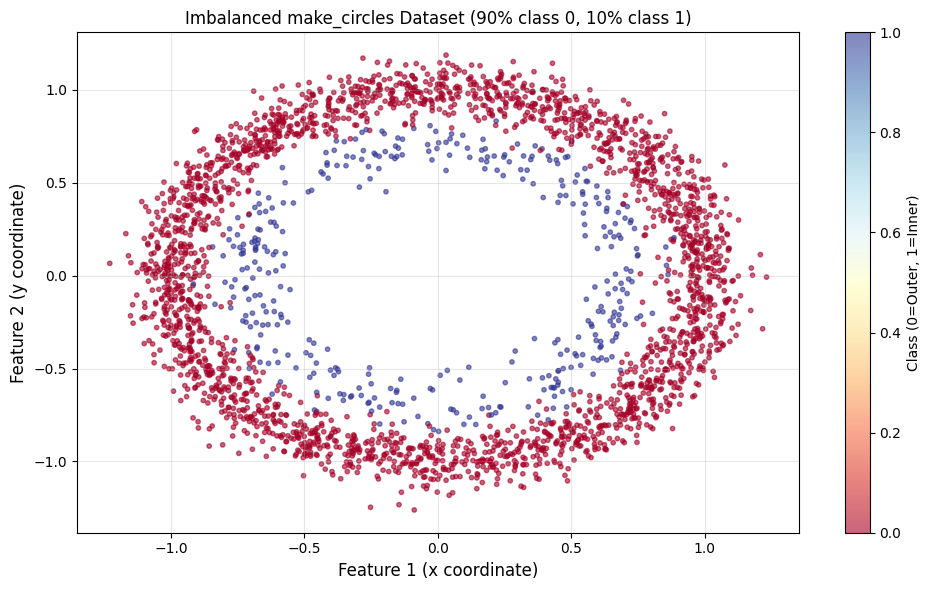

Epoch [20/100], Loss: 0.3696
Epoch [40/100], Loss: 0.3582
Epoch [60/100], Loss: 0.3414
Epoch [80/100], Loss: 0.3146
Epoch [100/100], Loss: 0.2705

Training complete!
Classification Metrics:
  Accuracy:  0.8696
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000


/Users/macos/Documents/PTN-Training/ml_pytorch_training/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [14]:

# Exercise 1: Metrics on imbalanced data
print("\nExercise 1: Metrics on imbalanced data")
print("Create imbalanced dataset (90% class 0, 10% class 1)")
print("Compare accuracy vs F1-score")
print("Tip: Use make_circles with different sample weights")

# Create balanced circles dataset first
X, y = make_circles(n_samples=5000, noise=0.08, factor=0.7, random_state=42)

# Separate classes
X0, y0 = X[y==0], y[y==0]
X1, y1 = X[y==1], y[y==1]

# Keep all class 0, keep around 10% of class 1
n_class1 = int(0.15 * len(y0)) 
X1_imbalanced = X1[:n_class1]
y1_imbalanced = y1[:n_class1]

# Combine into imbalanced dataset
X_imbalanced = np.vstack((X0, X1_imbalanced))
y_imbalanced = np.hstack((y0, y1_imbalanced))

# Shuffle dataset
perm = np.random.permutation(len(y_imbalanced))
X_imbalanced = X_imbalanced[perm]
y_imbalanced = y_imbalanced[perm]

print("Class distribution:")
print("Class 0:", np.sum(y_imbalanced == 0))
print("Class 1:", np.sum(y_imbalanced == 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.2, random_state=42, stratify=y_imbalanced
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.FloatTensor(y_train).unsqueeze(1).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.FloatTensor(y_test).unsqueeze(1).to(device)

plt.figure(figsize=(10, 6))
plt.scatter(X_imbalanced[:, 0], X_imbalanced[:, 1], c=y_imbalanced, cmap="RdYlBu", s=10, alpha=0.6)
plt.xlabel("Feature 1 (x coordinate)", fontsize=12)
plt.ylabel("Feature 2 (y coordinate)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label="Class (0=Outer, 1=Inner)")
plt.title("Imbalanced make_circles Dataset (90% class 0, 10% class 1)")
plt.tight_layout()
plt.show()

model = BinaryClassifier().to(device)
train_model(model, nn.BCEWithLogitsLoss(), optim.Adam(model.parameters(), lr=0.01), 100, X_train, y_train)

model.eval()
with torch.inference_mode():
    test_logits = model(X_test)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs > 0.5).long()

y_true = y_test.cpu().numpy().squeeze()
y_pred = test_preds.cpu().numpy().squeeze()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Classification Metrics:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")


In [15]:

# Exercise 2: Optimize for precision vs recall
print("\nExercise 2: Optimize for precision vs recall")
print("Try different thresholds:")
print("  - Higher threshold (0.7) -> Higher precision, lower recall")
print("  - Lower threshold (0.3) -> Lower precision, higher recall")
print("Tip: Modify (test_probs > 0.5) threshold")

X, y = make_circles(n_samples=2000, noise=0.03, factor=0.7, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.FloatTensor(y_train).unsqueeze(1).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.FloatTensor(y_test).unsqueeze(1).to(device)

thresholds = [0.7, 0.3, 0.5]
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model = BinaryClassifier().to(device)
train_model(model, criterion, optimizer, 100, X_train, y_train)

for threshold in thresholds:
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.sigmoid(test_logits)
        test_preds = (test_probs > threshold).long()

    y_true = y_test.cpu().numpy().squeeze()
    y_pred = test_preds.cpu().numpy().squeeze()

    accuracy = accuracy_score(y_true, y_pred)
    print("-"*60)
    print(f"Threshold={threshold}")
    print(f"Accuracy: {accuracy}")




Exercise 2: Optimize for precision vs recall
Try different thresholds:
  - Higher threshold (0.7) -> Higher precision, lower recall
  - Lower threshold (0.3) -> Lower precision, higher recall
Tip: Modify (test_probs > 0.5) threshold
Epoch [20/100], Loss: 0.6952
Epoch [40/100], Loss: 0.6952
Epoch [60/100], Loss: 0.6952
Epoch [80/100], Loss: 0.6952
Epoch [100/100], Loss: 0.6952

Training complete!
------------------------------------------------------------
Threshold=0.7
Accuracy: 0.4925
------------------------------------------------------------
Threshold=0.3
Accuracy: 0.5075
------------------------------------------------------------
Threshold=0.5
Accuracy: 0.5075


In [16]:
# Exercise 3: Compare different averaging methods
print("\nExercise 3: Compare averaging methods")
print("For multi-class, try different averaging:")
print("  - average='macro' (equal weight per class)")
print("  - average='weighted' (weight by class size)")
print("  - average='micro' (global counts)")
print("Tip: Modify the 'average' parameter")

averages = ['macro', 'weighted', 'micro']
for average in averages:
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)

    print("Multi-class Metrics:")
    print(f"  Accuracy:  {precision:.4f}")
    print(f"  Precision: {recall:.4f} ({average})")
    print(f"  Recall:    {recall_m:.4f} ({average})")
    print(f"  F1-Score:  {f1:.4f} ({average})")



Exercise 3: Compare averaging methods
For multi-class, try different averaging:
  - average='macro' (equal weight per class)
  - average='weighted' (weight by class size)
  - average='micro' (global counts)
Tip: Modify the 'average' parameter
Multi-class Metrics:
  Accuracy:  0.2537
  Precision: 0.5000 (macro)
  Recall:    1.0000 (macro)
  F1-Score:  0.3367 (macro)
Multi-class Metrics:
  Accuracy:  0.2576
  Precision: 0.5075 (weighted)
  Recall:    1.0000 (weighted)
  F1-Score:  0.3417 (weighted)
Multi-class Metrics:
  Accuracy:  0.5075
  Precision: 0.5075 (micro)
  Recall:    1.0000 (micro)
  F1-Score:  0.5075 (micro)


/Users/macos/Documents/PTN-Training/ml_pytorch_training/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/macos/Documents/PTN-Training/ml_pytorch_training/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [17]:

# Exercise 4: Create custom metric
print("\nExercise 4: Create custom metric")
print("Implement a custom metric:")
print("  - Specificity = TN / (TN + FP)")
print("  - False Positive Rate")
print("Tip: Use sklearn.metrics functions")

from sklearn.metrics import confusion_matrix

def specificity_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    return specificity, fpr


spec, fpr = specificity_fpr(y_true, y_pred)

print(f"Specificity (TNR): {spec:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")



Exercise 4: Create custom metric
Implement a custom metric:
  - Specificity = TN / (TN + FP)
  - False Positive Rate
Tip: Use sklearn.metrics functions
Specificity (TNR): 0.0000
False Positive Rate (FPR): 1.0000


In [18]:

# Exercise 5: Per-class metrics for multi-class
print("\nExercise 5: Per-class metrics")
print("Calculate precision/recall/F1 for each class separately")
print("Which class is hardest to classify?")
print("Tip: Iterate through each class and calculate metrics")

# y_true and y_pred already contain your multi-class labels and predictions
classes = np.unique(y_true)

per_class_f1 = []

print("\nPer-class metrics:")
for cls in classes:
    # Treat current class as "positive" and all others as "negative"
    y_true_cls = (y_true == cls).astype(int)
    y_pred_cls = (y_pred == cls).astype(int)

    precision = precision_score(y_true_cls, y_pred_cls, zero_division=0)
    recall = recall_score(y_true_cls, y_pred_cls, zero_division=0)
    f1 = f1_score(y_true_cls, y_pred_cls, zero_division=0)

    per_class_f1.append(f1)

    print(f"Class {cls}: "
          f"Precision = {precision:.4f}, "
          f"Recall = {recall:.4f}, "
          f"F1 = {f1:.4f}")

# Find which class is hardest to classify (lowest F1-score)
hardest_idx = int(np.argmin(per_class_f1))
hardest_class = classes[hardest_idx]
hardest_f1 = per_class_f1[hardest_idx]

print(f"\nHardest class to classify appears to be class {hardest_class} "
      f"(F1 = {hardest_f1:.4f})")


Exercise 5: Per-class metrics
Calculate precision/recall/F1 for each class separately
Which class is hardest to classify?
Tip: Iterate through each class and calculate metrics

Per-class metrics:
Class 0.0: Precision = 0.0000, Recall = 0.0000, F1 = 0.0000
Class 1.0: Precision = 0.5075, Recall = 1.0000, F1 = 0.6733

Hardest class to classify appears to be class 0.0 (F1 = 0.0000)


In [19]:

print("\n" + "=" * 60)
print("Exercise 5 Complete!")
print("Remember: If in doubt, run the code!")
print("Remember: Experiment, experiment, experiment!")
print("Remember: Visualize, visualize, visualize!")
print("=" * 60)



Exercise 5 Complete!
Remember: If in doubt, run the code!
Remember: Experiment, experiment, experiment!
Remember: Visualize, visualize, visualize!
